# Rishik Reddy Bandi
# 220968300

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("Dataset2.csv")
df

,cgpa,interactive,practical knowledge,skills,job offer
0,>=9,yes,very good,good,yes
1,>=8,no,good,moderate,yes
2,>=9,no,average,poor,no
3,<8,no,average,good,no
4,>=8,yes,good,moderate,yes
5,>=9,yes,good,moderate,yes
6,<8,yes,good,poor,no
7,>=9,no,very good,good,yes
8,>=8,yes,good,good,yes
9,>=8,yes,average,good,yes


In [4]:
df.isnull().sum()

cgpa                   0
interactive            0
practical knowledge    0
skills                 0
job offer              0
dtype: int64

In [5]:
features=df.iloc[:,:-1]
def label(df):
    le=LabelEncoder()
    for column in df.columns:
        df[column]=le.fit_transform(df[column])
    return df
features=label(features)
features

C:\Users\rrban\AppData\Local\Temp\ipykernel_12576\2590391308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=le.fit_transform(df[column])
C:\Users\rrban\AppData\Local\Temp\ipykernel_12576\2590391308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=le.fit_transform(df[column])
C:\Users\rrban\AppData\Local\Temp\ipykernel_12576\2590391308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,cgpa,interactive,practical knowledge,skills
0,2,1,2,0
1,1,0,1,1
2,2,0,0,2
3,0,0,0,0
4,1,1,1,1
5,2,1,1,1
6,0,1,1,2
7,2,0,2,0
8,1,1,1,0
9,1,1,0,0


In [6]:
y=df["job offer"]
y

0    yes
1    yes
2     no
3     no
4    yes
5    yes
6     no
7    yes
8    yes
9    yes
Name: job offer, dtype: object

In [7]:
x_train,x_test,y_train,y_test=train_test_split(features,y,test_size=0.3)

In [8]:
model=DecisionTreeClassifier(criterion="entropy")
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
y_pred=model.predict(x_test)
y_pred

array(['yes', 'yes', 'yes'], dtype=object)

In [10]:
model.score(x_test,y_test)

1.0

In [11]:
accuracy_score(y_test,y_pred)

1.0

In [12]:
model.feature_importances_

array([0.52339444, 0.        , 0.        , 0.47660556])

In [13]:
model.tree_.max_depth

2

<Axes: >

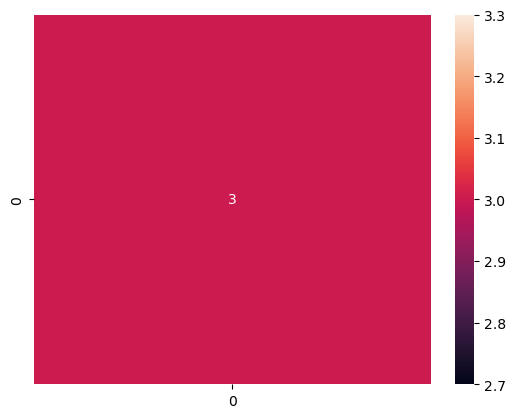

In [21]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [31]:
feature_names=features.columns
fnl = feature_names.tolist()
class_names=df["job offer"]
cnl = class_names.tolist()

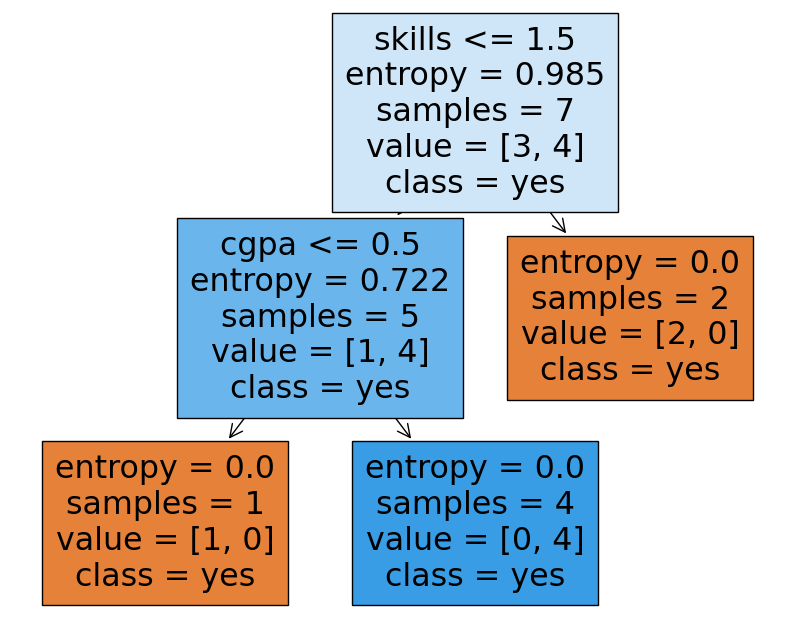

In [33]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=fnl,  class_names=cnl,filled=True)
plt.show()

In [35]:
with open('DT2.txt',"w") as f:
    f=tree.export_graphviz(model,out_file=f)